## Carbon Emission regressor

### Exploratory data analysis

In this notebook, all insights and transformations for the raw data will be performed to improve its quality for further use in a ML model.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import ast

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

import joblib
import os

In [12]:
df = pd.read_csv("Data/data.csv")
df

,body_type,sex,diet,shower_freq,heat_energy_source,transport,vehicle_type,social,monthly_grocery_bill,air_travel_freq,vehicle_km,waste_bag_size,waste_bag_count,tv_daily_time,monthly_clothes,internet_daily_time,energy_eff,recycling,cooking_with,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,21.444701,26,3.927957,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,15.896360,38,22.948439,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,6.250881,47,5.005541,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,4.843126,5,20.098744,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,22.520759,5,0.562809,Yes,['Paper'],['Oven'],4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,obese,male,omnivore,twice a day,coal,private,hybrid,sometimes,230,never,268,medium,5,13.483293,27,12.785079,Yes,[],['Microwave'],2408
9996,normal,female,vegan,twice a day,coal,private,lpg,never,234,frequently,5316,extra large,3,5.087468,8,12.326064,Sometimes,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084
9997,overweight,female,vegetarian,daily,electricity,walk/bicycle,NaN,sometimes,298,very frequently,96,extra large,5,3.506788,5,17.491438,Yes,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377
9998,underweight,male,vegan,more frequently,coal,private,petrol,often,179,rarely,8688,medium,5,4.532247,14,21.379414,Sometimes,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574


#### Dependent variable


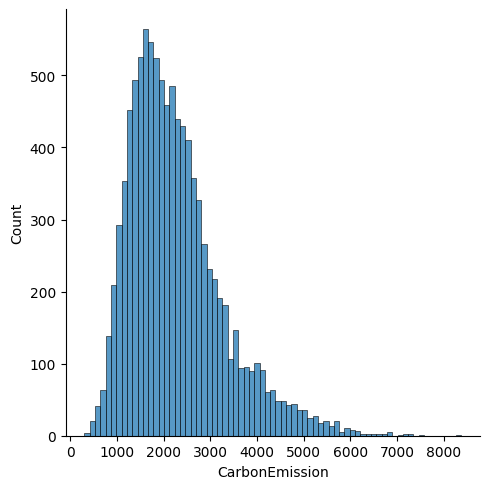

In [13]:
sns.displot(df["CarbonEmission"])

In this case, the dependent variable, carbon emissions, has a left-skewed distribution. A natural logarithm transformation can be applied to make it more normally distributed

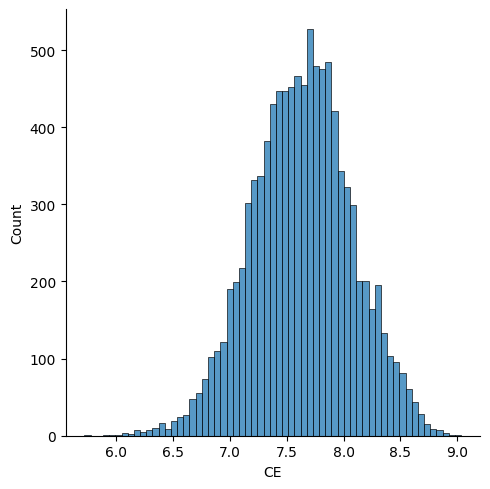

In [14]:
df["CE"] = np.log(df["CarbonEmission"])
sns.displot(df["CE"])

In [15]:
df.drop(columns="CarbonEmission", inplace=True)

#### Categorical columns

Some categories have lists as input data. In these cases, the lists will be sorted and converted to strings to allow for proper encoding.

In [16]:
def list_transform(x):
    x = ast.literal_eval(x)
    x = sorted(x)
    return str(x)

df["recycling"] = df["recycling"].apply(list_transform)
df["cooking_with"] = df["cooking_with"].apply(list_transform)

Vehicle type `NaN` values represent no vehicle, so changed

In [7]:
df["vehicle_type"] = df["vehicle_type"].fillna("no")	

In [8]:
cat_cols = []
cont_cols = []

for col in df.columns:
    if df[col].dtype == "object":
        cat_cols.append(col)
    else:
        cont_cols.append(col)

In [9]:
# Label Encoding of the categorical columns

label_encoders = {}

for col in cat_cols:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_encoders[col] = label_encoder

    # Save each label encoder as a separate .pkl file using joblib
    joblib.dump(label_encoder, f'label_encoders/{col}.pkl')

In [10]:
df

,body_type,sex,diet,shower_freq,heat_energy_source,transport,vehicle_type,social,monthly_grocery_bill,air_travel_freq,vehicle_km,waste_bag_size,waste_bag_count,tv_daily_time,monthly_clothes,internet_daily_time,energy_eff,recycling,cooking_with,CE
0,2,0,1,0,0,1,4,1,230,0,210,1,4,21.444701,26,3.927957,0,11,12,7.713338
1,1,0,3,1,2,2,4,1,114,2,9,0,3,15.896360,38,22.948439,0,11,10,7.545390
2,2,1,0,2,3,0,5,0,138,1,2472,3,1,6.250881,47,5.005541,1,11,9,7.861342
3,2,1,0,3,3,2,4,2,157,2,74,2,3,4.843126,5,20.098744,1,0,3,6.979145
4,1,0,3,0,0,0,0,1,266,3,8457,1,1,22.520759,5,0.562809,2,13,13,8.464425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,0,3,0,0,2,2,230,1,268,2,5,13.483293,27,12.785079,2,15,11,7.786552
9996,0,0,2,3,0,0,3,0,234,0,5316,0,3,5.087468,8,12.326064,1,12,10,8.033983
9997,2,0,3,0,1,2,4,2,298,3,96,0,5,3.506788,5,17.491438,2,8,3,7.773594
9998,3,1,2,2,0,0,5,1,179,2,8688,2,5,4.532247,14,21.379414,1,9,2,8.428143


#### Continuous columns

In [ ]:
sns.pairplot(df[cont_cols])

Vehicle km shows a big skew towards small values, despite that no transformation will be applied.

#### Correlations and Variance Inflation Factor (VIF)

This analysis will be performed to check the dependce between the independent variables

In [11]:
X = df.drop(columns="CE")
y = df["CE"]

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(X)

The independent variables show collinearity between each other, which is not ideal. For this case some variables will be chosen to be dropped. 

In [ ]:
X_corr = X.corr()

for col in X_corr.columns:
    max_corr = max(X_corr[col][X_corr[col] < 1])  # Exclude correlation coefficient of 1
    print(col, max_corr)

From the feature selection and the correlation table, the features selected to be dropped are the follwoing:
- Vehicle type

In [ ]:
X_new = X.drop(columns=["vehicle_type"])
calc_vif(X_new) # Improvement in all variables

In [17]:
df1 = X[X_new.columns]
df1.loc[:, "CE"] = y

In [18]:
df1.to_csv('Data/train.csv', index=False)